## Additional work  for HackDartmouth IV - QSS Data Science Challenge
## Neural Network

### Import dataset

In [35]:
import numpy as np
import pandas as pd
from gensim.models.doc2vec import Doc2Vec

In [2]:
from collections import Counter
from datetime import datetime

In [1]:
from keras.layers import Embedding, LSTM, Dense, Conv1D, MaxPooling1D, Dropout, Activation
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences


/Users/yipeng/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
## Load Dataset
fname = 'yelp.json'
df    = pd.read_json(fname)


# Convert Select Cols to categories 
catcols = ['business_id','user_id']
for col in catcols:
    df[col] = df[col].astype('category')

df['user_id'] = df.user_id.cat.codes
df['business_id'] = df.business_id.cat.codes

# Convert Date to Better Format
# Using month, day & year
df['month'] = df.date.dt.month
df['day']   = df.date.dt.day
df['year']  = df.date.dt.year
df['dOw']   = df.date.dt.dayofweek


In [5]:
df.drop('date', axis=1)
cols  = ['business_id','user_id','review_id',
         'year','month','day','dOw','cool',
         'funny','useful','text','stars']
df    = df[cols]

### Tokenize reviews

In [23]:
reviews=df['text']
labels=df['stars']

In [26]:
from keras.utils import np_utils

In [29]:
### one hot encoding
dummy_labels = np_utils.to_categorical(labels-1)

In [30]:
dummy_labels
#five categories 

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.]])

In [15]:
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(reviews)
sequences = tokenizer.texts_to_sequences(reviews)
data = pad_sequences(sequences, maxlen=300)

### Build a RNN model

-  Sequential model
- Embedding layer. This layer lets the network expand each token to a larger vector
- CNN layer. This allow the LSTM to see sequences of chunks instead of sequences of words
- LSTM layer for sequence processing
- A Dense layer

In [32]:
model = Sequential()
model.add(Embedding(1000, 128, input_length=300))
model.add(Dropout(0.2))
model.add(Conv1D(64, 5, activation='relu'))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(128))
model.add(Dense(5, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(data, dummy_labels, validation_split=0.5, epochs=3)

Train on 374787 samples, validate on 374787 samples
Epoch 1/3
374787/374787 [==============================] - 3012s 8ms/step - loss: 0.8086 - acc: 0.6580 - val_loss: 0.7548 - val_acc: 0.6801
Epoch 2/3
374787/374787 [==============================] - 13072s 35ms/step - loss: 0.7384 - acc: 0.6871 - val_loss: 0.7383 - val_acc: 0.6856
Epoch 3/3
374787/374787 [==============================] - 3224s 9ms/step - loss: 0.7119 - acc: 0.6977 - val_loss: 0.7228 - val_acc: 0.6922


#### Accuracy is 69.2% after three epochs, and no overfitting yet

In [36]:
accu=pd.Series([0.563,0.645,0.692],index=['Word2Vec','Doc2Vec','NeuralNet'])

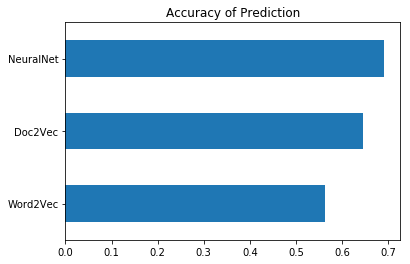

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline
accu.plot('barh')
plt.title('Accuracy of Prediction')